In [1]:
# define a state
from typing import TypedDict
class PortFolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

    

In [2]:
myobj = PortFolioState(amount_usd=100, total_usd=100, total_inr=100)

print(myobj)



{'amount_usd': 100, 'total_usd': 100, 'total_inr': 100}


In [3]:
def cal_tatal(state: PortFolioState) -> PortFolioState:
    state["total_usd"] = state["amount_usd"] *1.08
    return state

def convert_to_inr(state: PortFolioState) -> PortFolioState:
    state["total_inr"] = state["total_usd"] * 85
    return state


In [9]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortFolioState) # state pass as a parameter

builder.add_node("calculate_total", cal_tatal)
builder.add_node("convert_to_inr", convert_to_inr)

builder.add_edge(START, "calculate_total")
builder.add_edge("calculate_total", "convert_to_inr")
builder.add_edge("convert_to_inr", END)

graph = builder.compile()

graph.invoke({"amount_usd": 100})

{'amount_usd': 100, 'total_usd': 108.0, 'total_inr': 9180.0}

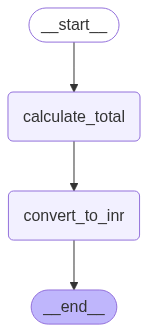

In [ ]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))


In [11]:
graph.invoke({"amount_usd": 1000})


{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}